In [73]:
##reference Udacity perceptron code

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_pred = prediction(X[i],W,b)
        if y[i]-y_pred == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_pred == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 10):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines



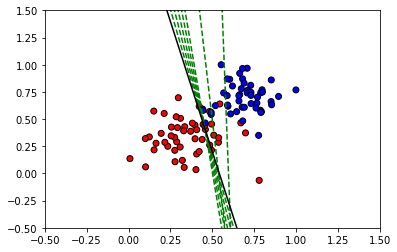

In [74]:
#VISUALIZATION
data = pd.read_csv("data.csv",header= None)
X = data.iloc[:, 0:2].to_numpy()
y = data.iloc[:,2].to_numpy()
boundary_lines = trainPerceptronAlgorithm(X,y)
#print(boundary_lines)

def abline(slope, intercept,i):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    if i == len(boundary_lines) - 1:
        plt.plot(x_vals, y_vals,color='black')
    else:
        plt.plot(x_vals, y_vals, '--',color='green')
    
slope = [i[0][0] for i in boundary_lines]
intercepts = [i[1][0] for i in boundary_lines]

plt.scatter(X[:,0],X[:,1],c=y,marker='o',edgecolors='black',cmap='bwr')

for i in range(len(slope)):
    abline(slope[i],intercepts[i],i)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)